In [ ]:
# libraries that we have imported
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Start exploring the data

In [ ]:
# import our data "water_portability" 
df = pd.read_csv("water_potability.csv")

In [ ]:
# exploring our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# display the values format of our data 
df.head()
# print the number of rows and columns
num_rows, num_columns = df.shape
print('Number of rows:', num_rows)
print('Number of columns:', num_columns)

Number of rows: 3276
Number of columns: 10


In [ ]:
# count the unique values of each column
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

# Data visualization

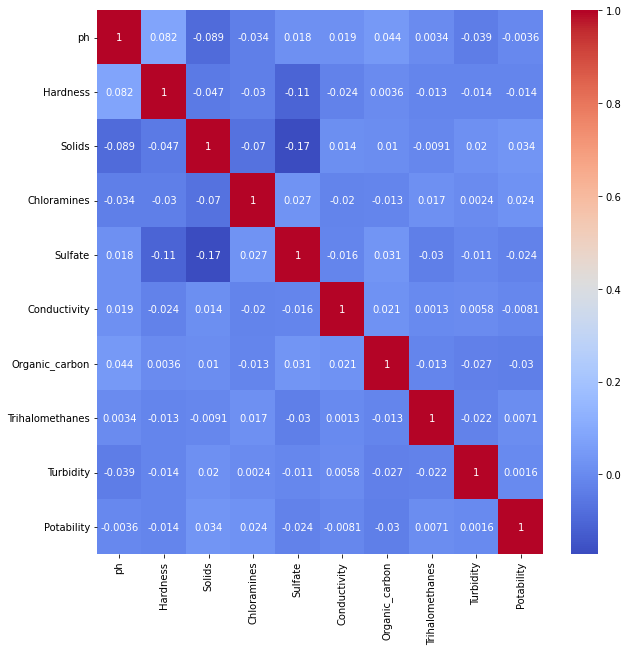

In [ ]:
# heatmap to find the correlation between the columns 
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

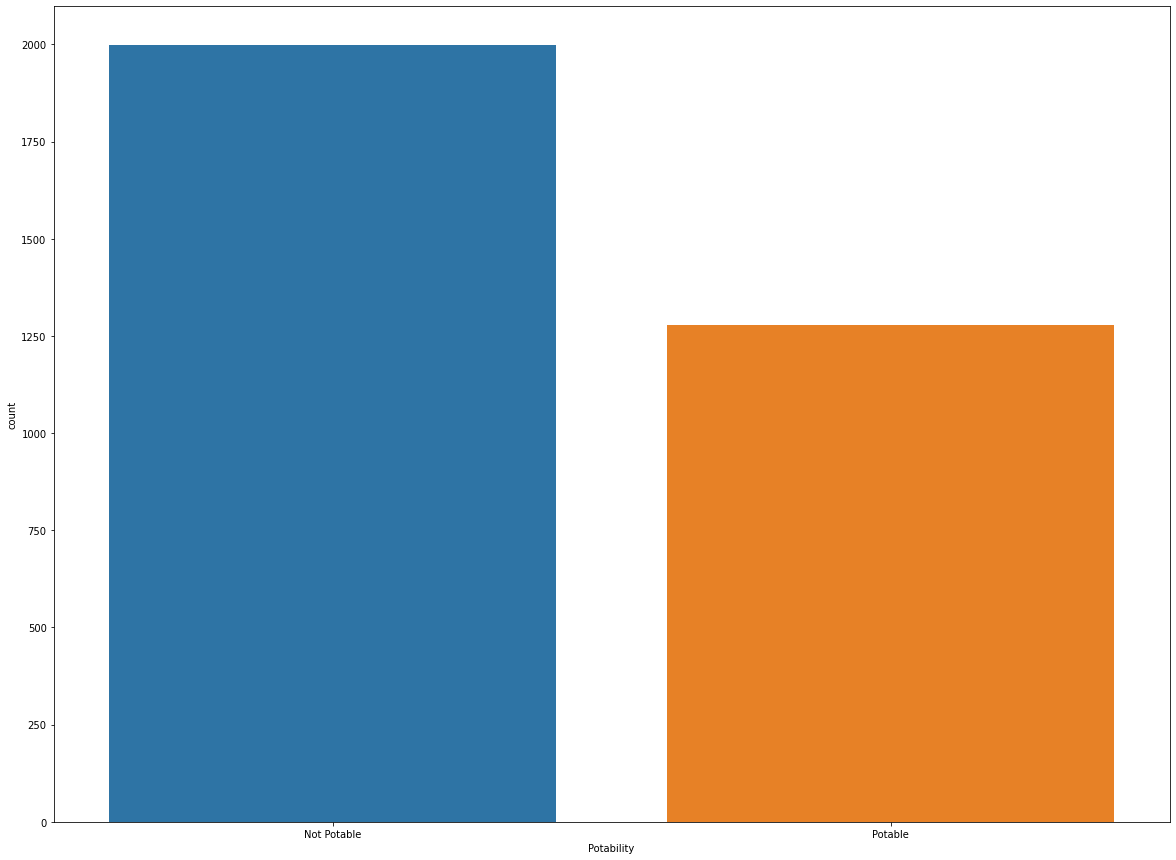

In [ ]:
# display the number of not potable and potable water 
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [ ]:
fig =  px.pie (df, names = "Potability", hole = 0.8)
fig.show ()

# Start preprocessing

1- Identifying outliers. (This is because replacing the missing values first can lead to incorrect or biased data)
2- Cleaning the data by identifying and correcting or removing incorrect, incomplete values.
3- Imputing the data by replacing missing values with estimates.
4- Rescaling the data points to ensure that all features have the same range and are comparable.

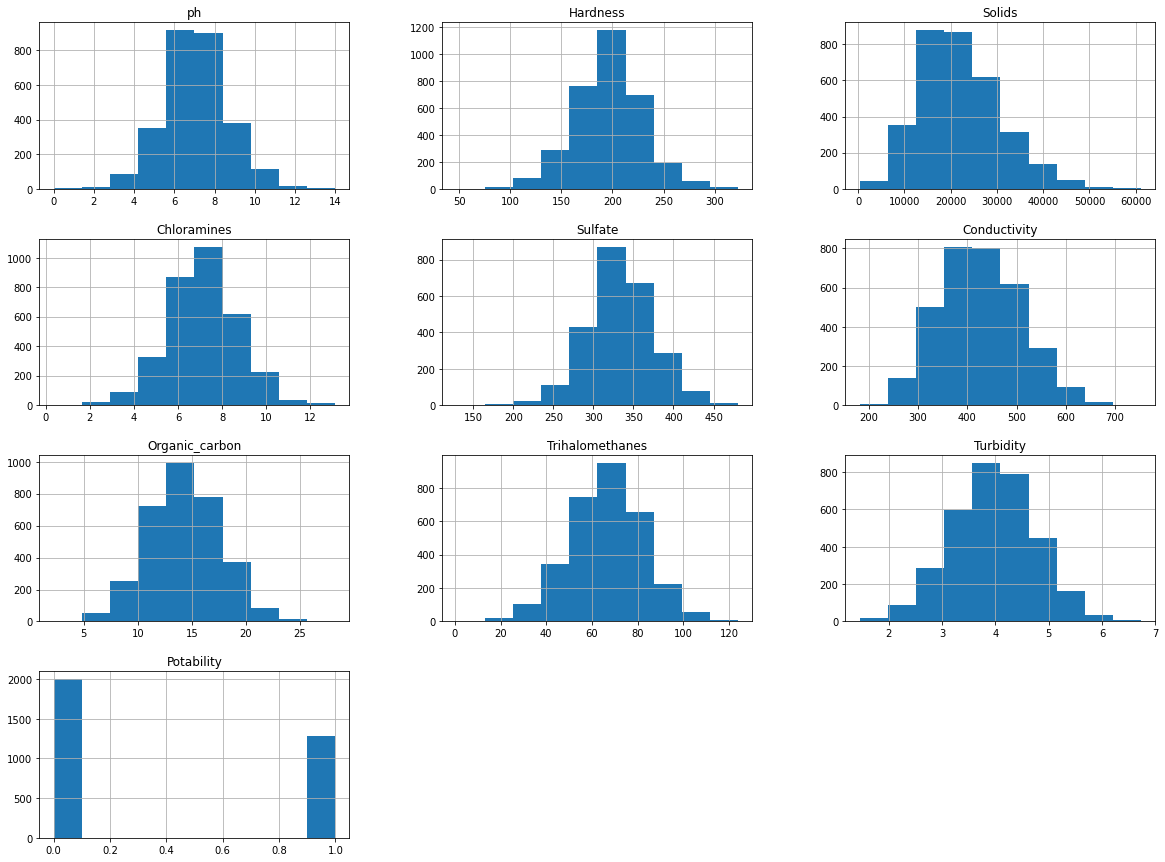

In [ ]:
# plot the every column.
plt.rcParams['figure.figsize'] = [20,15]
df.hist()
plt.show()

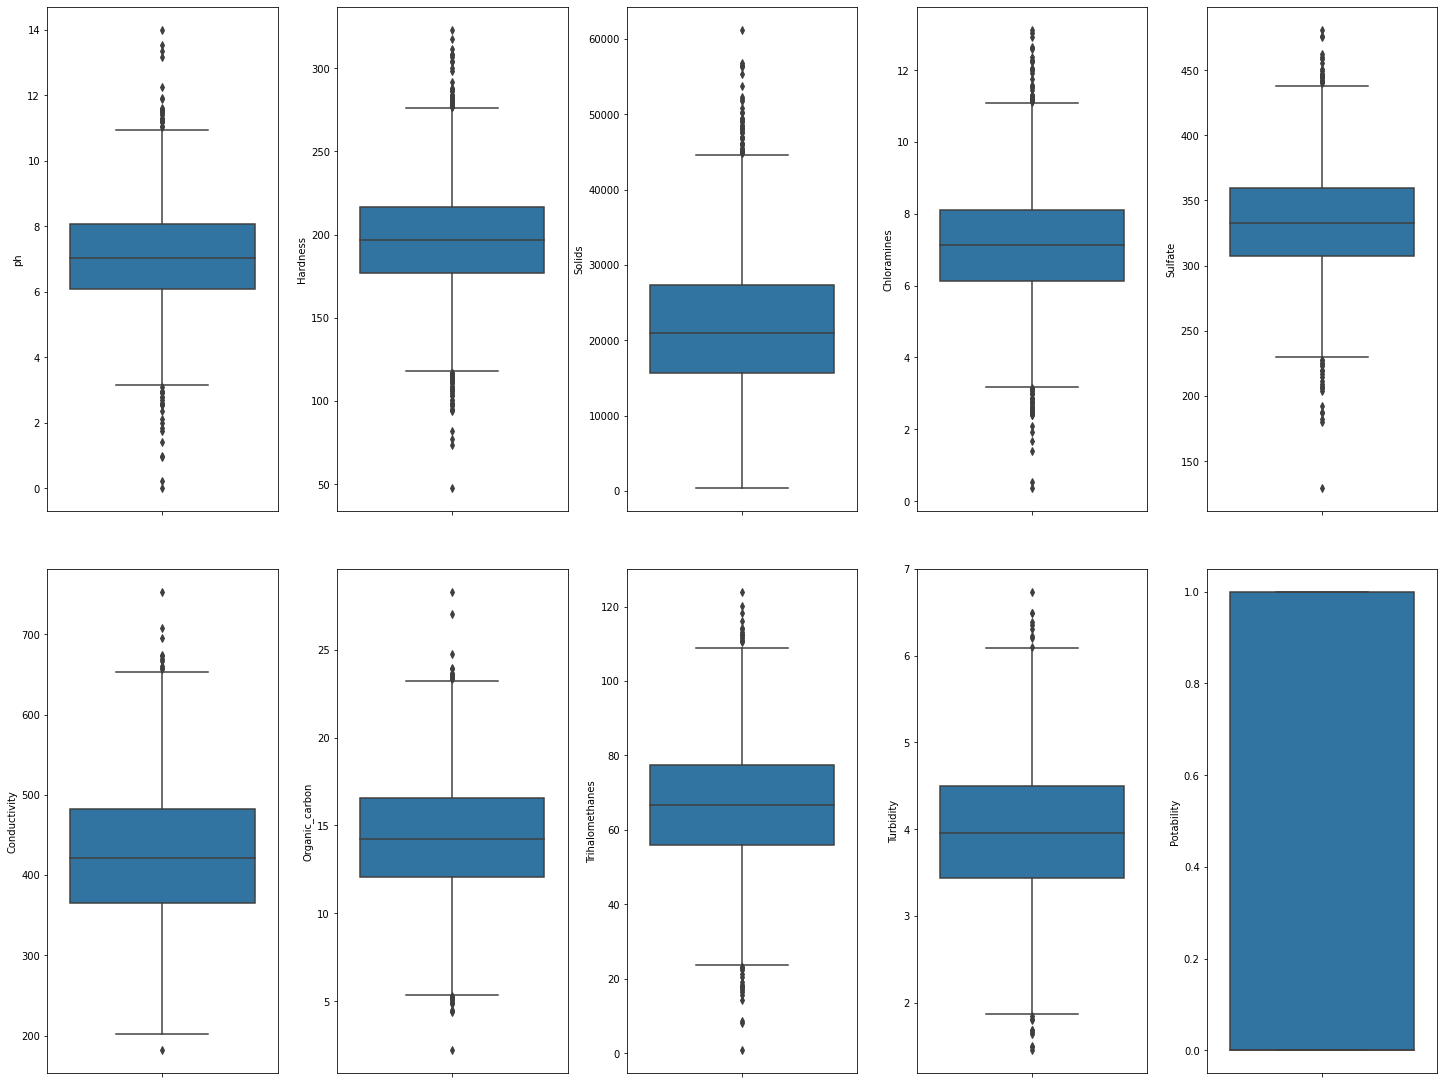

In [ ]:
# detect the outliers using boxplot
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# step1: detect the outliers
for col in df.columns[:-1]:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in ph: 0
Number of outliers in Hardness: 83
Number of outliers in Solids: 47
Number of outliers in Chloramines: 61
Number of outliers in Sulfate: 0
Number of outliers in Conductivity: 11
Number of outliers in Organic_carbon: 25
Number of outliers in Trihalomethanes: 0
Number of outliers in Turbidity: 19


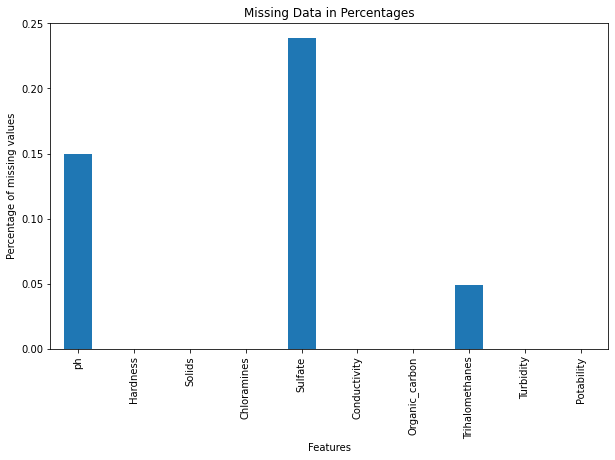

In [ ]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

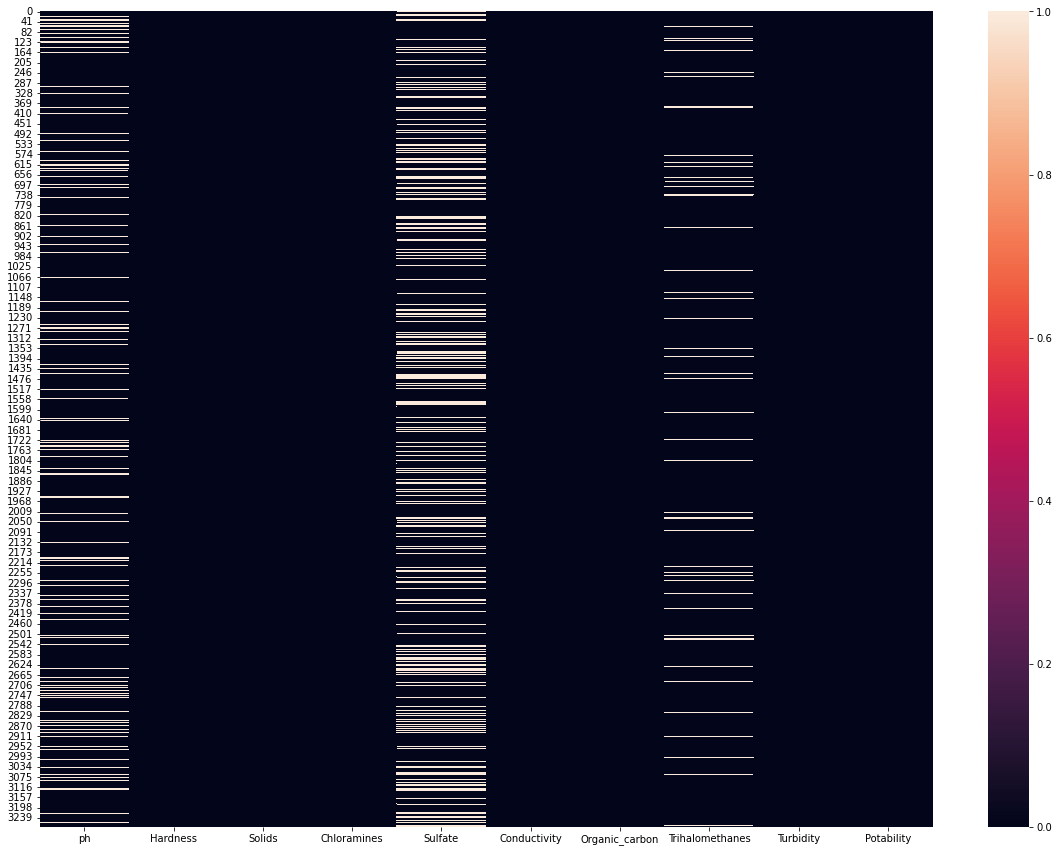

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# step2: identifying missing values in our data 
columns = ['ph','Hardness','Solids','Chloramines','Sulfate',
          'Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
for col in columns:
    count = df[col].isnull().sum()
    if count != 0:
        print(f"the number of missing values in {col} equals {count}")
        percent_missing = df[col].isnull().sum() / df[col].shape[0]
        print(f'Percent of missing values in {col}: {percent_missing*100}\n')
        
# we observed that we have some missing values in only three columns.

the number of missing values in ph equals 491
Percent of missing values in ph: 14.987789987789988

the number of missing values in Sulfate equals 781
Percent of missing values in Sulfate: 23.84004884004884

the number of missing values in Trihalomethanes equals 162
Percent of missing values in Trihalomethanes: 4.945054945054945



In [ ]:
# step3: we will replace the missing values with the mean of each column
columns = ['ph','Sulfate','Trihalomethanes']
for col in df:
    df[col].fillna(df[col].mean(), inplace=True)

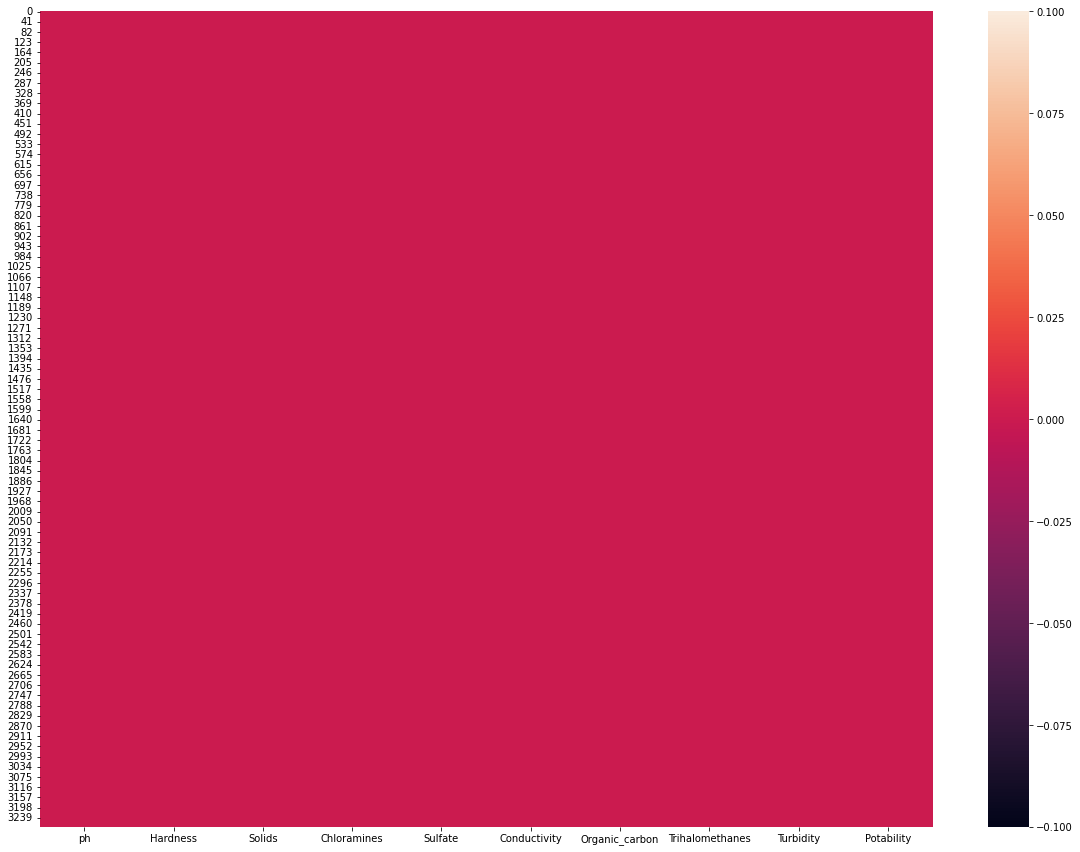

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# check our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# step4: Create a MinMaxScaler object
scaler = MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


# Start applying our algorithms
1- SVM
2- Logistic Regression
3- Random Forest
4- Decision Tree

******************************************************
Step1: detect our target feature
step2: split the data into training and test data sets
step3: Applying the algorithm

In [ ]:
x=scaled_df.loc[:, scaled_df.columns != 'Potability']
y=scaled_df.loc[:, scaled_df.columns=='Potability']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)





/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6730769230769231


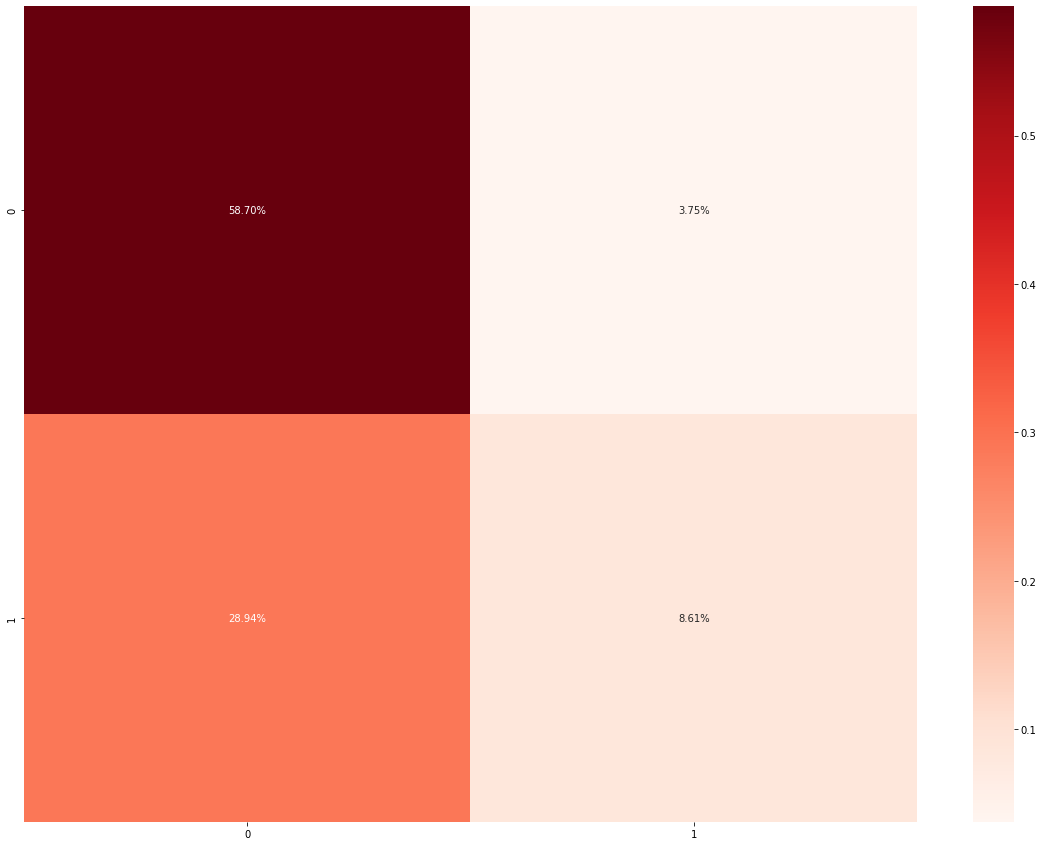

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
SVC(random_state=42)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6263736263736264
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       682
         1.0       1.00      0.00      0.01       410

    accuracy                           0.63      1092
   macro avg       0.81      0.50      0.39      1092
weighted avg       0.77      0.63      0.48      1092



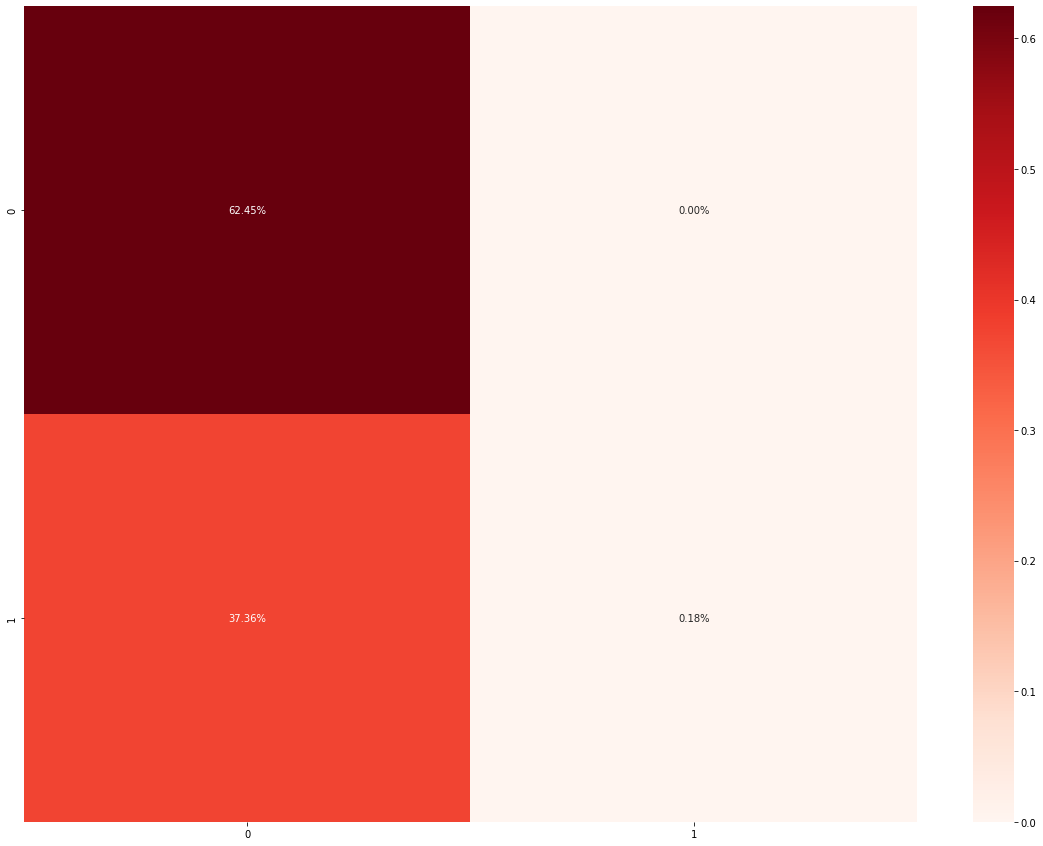

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

# Making Prediction
pred_lg = model_lg.predict(X_test)

# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)
print(classification_report(y_test,pred_lg))
        
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')


<ipython-input-337-03f015512718>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6245421245421245
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       682
         1.0       0.00      0.00      0.00       410

    accuracy                           0.62      1092
   macro avg       0.31      0.50      0.38      1092
weighted avg       0.39      0.62      0.48      1092



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



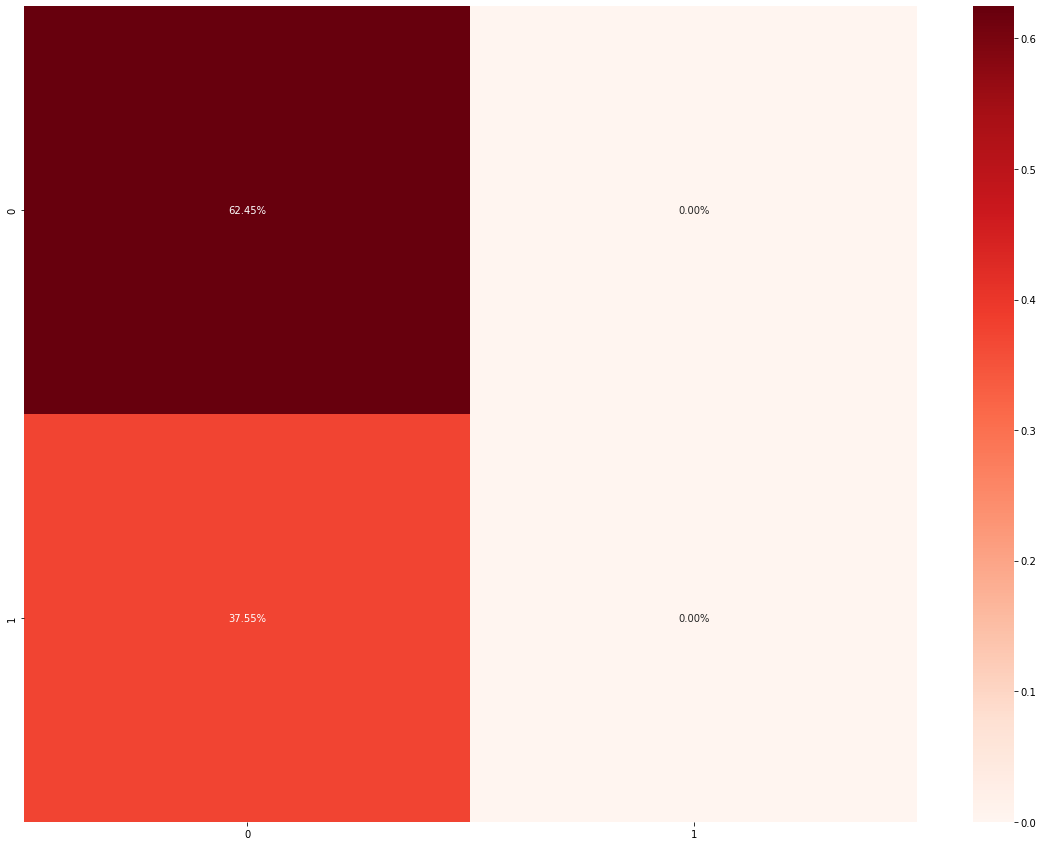

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

# Making Prediction
pred_rf = model_rf.predict(X_test)

# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)
print(classification_report(y_test,pred_rf))

# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')


0.6282051282051282
              precision    recall  f1-score   support

         0.0       0.64      0.91      0.75       682
         1.0       0.52      0.15      0.23       410

    accuracy                           0.63      1092
   macro avg       0.58      0.53      0.49      1092
weighted avg       0.59      0.63      0.56      1092



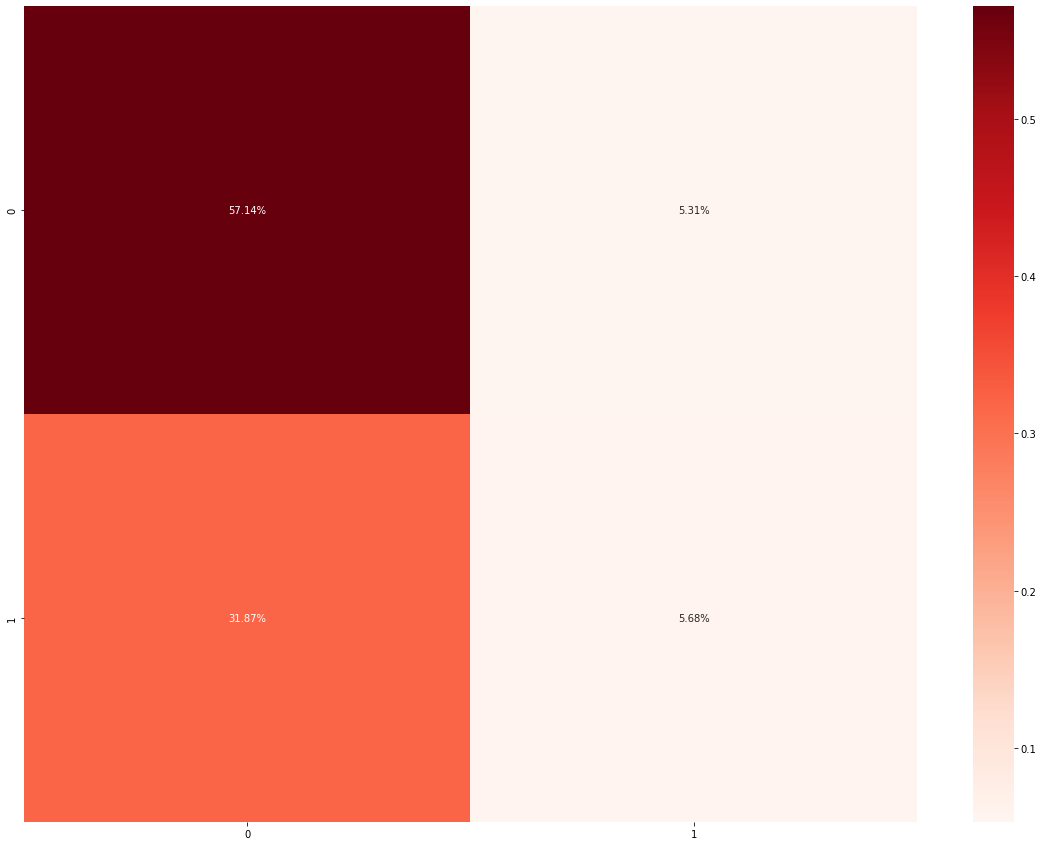

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=4, random_state=42)

# Making Prediction
pred_dt = model_dt.predict(X_test)

# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
print(classification_report(y_test,pred_dt))

# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')


,Model,Accuracy_score
0,SVM,0.673077
3,Decision Tree,0.628205
1,Logistic Regression,0.626374
2,Random Forest,0.624542


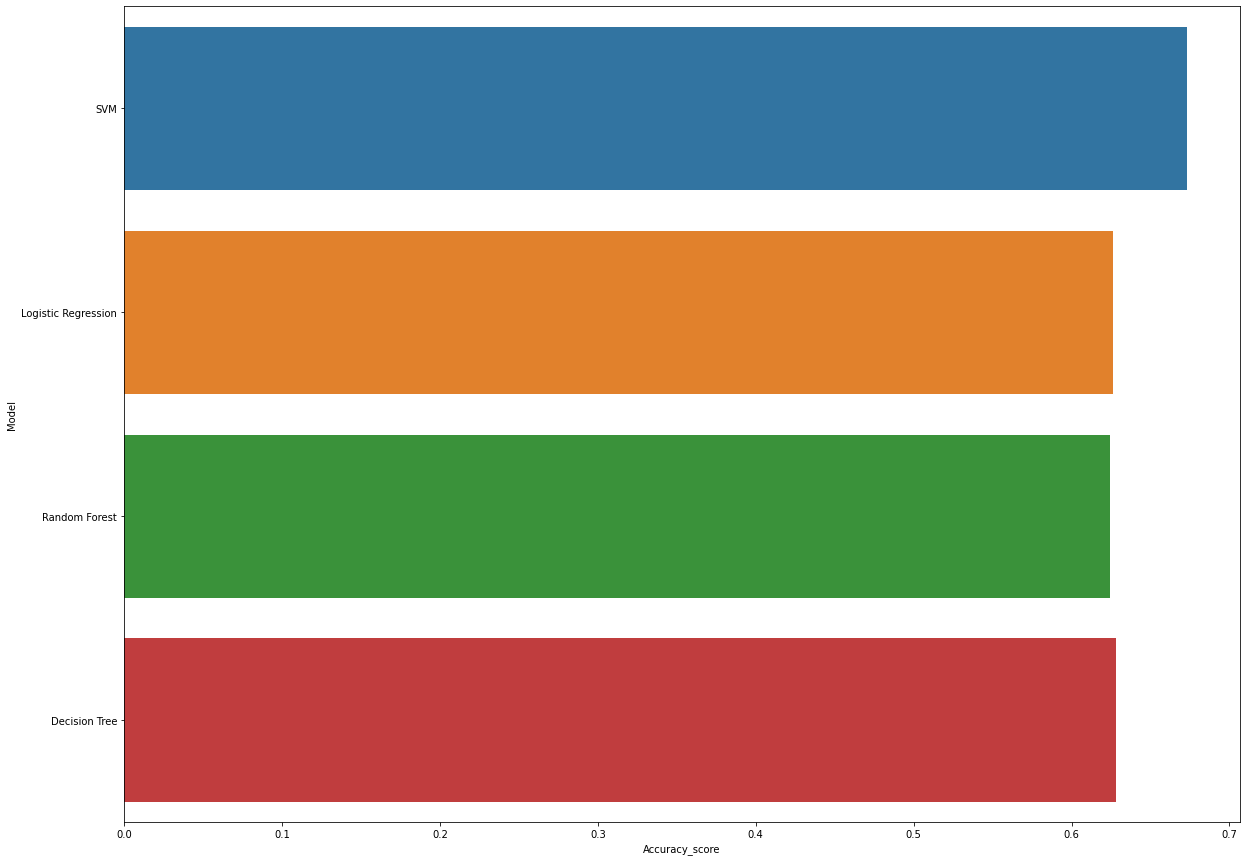

In [ ]:
models = pd.DataFrame({
    'Model':['SVM','Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy_score' :[sv, lg, rf, dt]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model_svm, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))